In [2]:
import pickle
import gzip
import numpy as np
import os
import time
import cv2
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, TensorDataset
import torch.optim as optim
import segmentation_models_pytorch as smp
from matplotlib import pyplot as plt
from torchsummary import summary

### Helper functions

In [3]:
def load_zipped_pickle(filename):
    with gzip.open(filename, 'rb') as f:
        loaded_object = pickle.load(f)
        return loaded_object

In [4]:
def save_zipped_pickle(obj, filename):
    with gzip.open(filename, 'wb') as f:
        pickle.dump(obj, f, 2)
        
def flatten(dicts):
    
    # extract the annotated video frames, their labels
    # and the boxes
    
    images = []
    boxes = []
    labels = []
    
    for i, dic in enumerate(dicts):
        
        video = dic['video']
        frames = dic['frames']
        dic_labels = dic['label']
        
        images.append((video[:,:,frames[0]] / 255).astype('float32'))
        images.append((video[:,:,frames[1]] / 255).astype('float32'))
        images.append((video[:,:,frames[2]] / 255).astype('float32'))
        
        labels.append(dic_labels[:,:,frames[0]].astype('float32'))
        labels.append(dic_labels[:,:,frames[1]].astype('float32'))
        labels.append(dic_labels[:,:,frames[2]].astype('float32'))
        
        boxes.append(dic['box'].astype('uint8'))
        boxes.append(dic['box'].astype('uint8'))
        boxes.append(dic['box'].astype('uint8'))
        
    return images, boxes, labels

def resize(images, boxes, labels, size):
    
    # resize images, boxes and labels

    for i in range(len(images)):
        
        images[i] = cv2.resize(images[i], size, interpolation = cv2.INTER_LANCZOS4)
        boxes[i] = cv2.resize(boxes[i], size, interpolation = cv2.INTER_LANCZOS4)
        labels[i] = cv2.resize(labels[i], size, interpolation = cv2.INTER_LANCZOS4)
        
        # add number of channels (in this case 1) at the front for the
        # right input shape for the pytorch layers
        
        images[i] = np.expand_dims(images[i], axis=0)
        images[i] = np.expand_dims(images[i], axis=0)
        
        labels[i] = np.expand_dims(labels[i], axis=0)
        
    return np.concatenate(images, axis=0), boxes, np.concatenate(labels, axis=0)

### Load data

In [5]:
# load data
train_data = load_zipped_pickle("data/train.pkl")
test_data = load_zipped_pickle("data/test.pkl")

In [6]:
size = (128, 128)

### Preprocessing

In [7]:
# turn dictionaries into lists of images, boxes and labels
images, boxes, labels = flatten(train_data)
# resize all images, boxes and labels
#images, boxes, labels = resize(images, boxes, labels, size)

In [21]:
img = (images[3] * 255).astype('uint8')

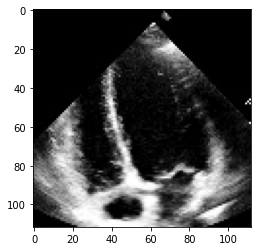

In [22]:
plt.imshow(img, cmap='gray')

In [46]:
equ = cv2.equalizeHist(img)

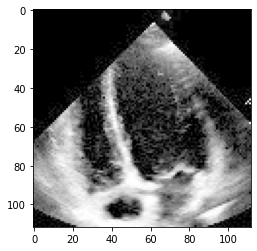

In [47]:
plt.imshow(equ, cmap='gray')

In [50]:
denoised = cv2.nonLocalMeans(img)

AttributeError: module 'cv2' has no attribute 'nonLocalMeans'

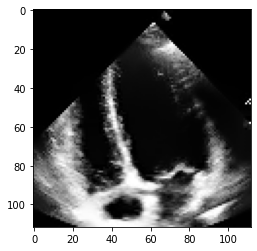

In [49]:
plt.imshow(denoised, cmap='gray')